## Aluno: Ilton Albuquerque Martins de Lima - iaml@cesar.school

## Series Temporais - Professor - Pedro Henrique



## Importação das Bibliotecas

In [1]:
!pip install pydataset pmdarima tsai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 60.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from pmdarima.arima import KPSSTest
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#from tsai.all import *

## Definição do Dataset

O Dataset se trata:

Do Faturamento e Resultado financeiro dos times do campeonato brasileiro entre 2007 e 2020


In [3]:
df = pd.read_csv('/content/Faturamento_Brasileirao.csv')

## Análise Descritiva dos Dados

In [4]:
df.head()

,Posição,Clube,Estado,Faturamento,Deficit ou Superavit,Ano,Faturamento(Milhões),Superavit/Deficit(Milhões)
0,1,Palmeiras,São Paulo,"R$ 947,6 Milhões[1]","R$ 123,4 Milhões[1]",2021,947.6,123.4
1,1,Flamengo,Rio de Janeiro,"R$ 668,6 milhões[23]","R$ -106,9 milhões[4]",2020,668.6,106.9
2,2,Atlético Mineiro,Minas Gerais,"R$ 615,8 milhões[5]","R$ 19,2 milhões[5]",2020,615.8,19.2
3,3,Palmeiras,São Paulo,"R$ 611,8 milhões[6]","R$ -151,0 milhões[6]",2020,611.8,151.0
4,4,Grêmio,Rio Grande do Sul,"R$ 489,0 milhões[24]","R$ 37,5 milhões[24]",2020,489.0,37.5


In [5]:
df.columns

Index(['Posição', 'Clube', 'Estado', 'Faturamento', 'Deficit ou Superavit',
       'Ano', 'Faturamento(Milhões)', 'Superavit/Deficit(Milhões)'],
      dtype='object')

In [6]:
df.shape

(281, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Posição                     281 non-null    int64  
 1   Clube                       281 non-null    object 
 2   Estado                      281 non-null    object 
 3   Faturamento                 281 non-null    object 
 4   Deficit ou Superavit        281 non-null    object 
 5   Ano                         281 non-null    int64  
 6   Faturamento(Milhões)        281 non-null    float64
 7   Superavit/Deficit(Milhões)  281 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 17.7+ KB


<Axes: xlabel='Ano', ylabel='Faturamento(Milhões)'>

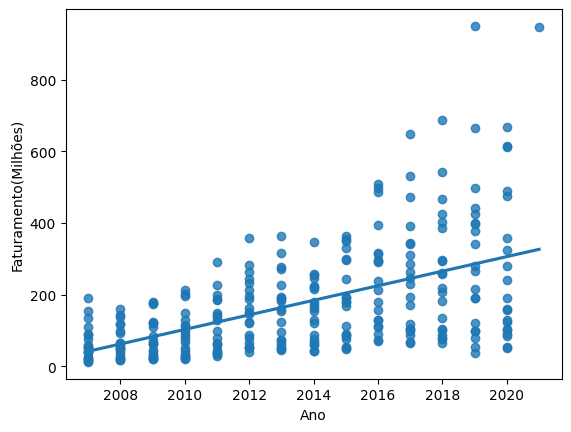

In [8]:
import seaborn as sns

sns.regplot(data = df, x = 'Ano', y = 'Faturamento(Milhões)', ci=None)

Como o gráfico acima demostra ao passar dos anos os faturamentos dos clubes brasileiros tem aumentado. Isso se dá por conta do aumento dos direitos televisivos, dos números de sócios, renda dos jogos entre outras situações.

<Axes: xlabel='Ano', ylabel='Superavit/Deficit(Milhões)'>

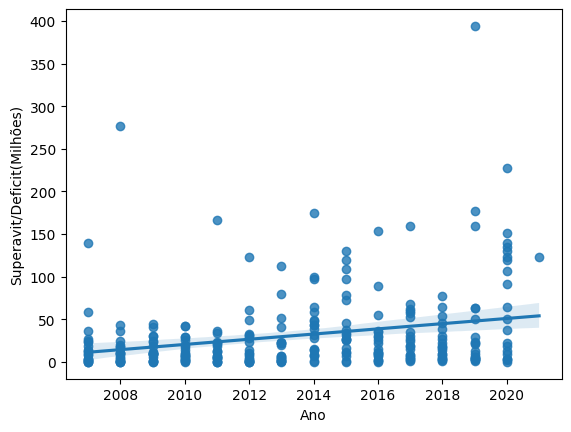

In [9]:
sns.regplot(data = df, x = 'Ano', y = 'Superavit/Deficit(Milhões)')

## ACF

In [10]:
faturamento = df['Faturamento(Milhões)']

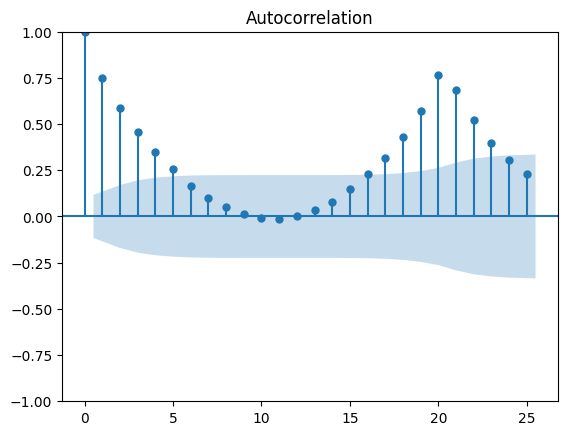

In [11]:
plot_acf(faturamento)
plt.show()

Gráfico ACF: Com uma cauda longa e decaindo: Isso pode sugerir que a série segue um processo AR, ou seja, o valor atual depende de muitos valores passados.


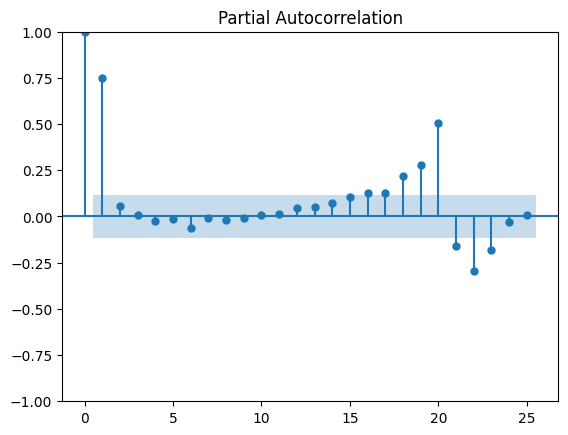

In [12]:
plot_pacf(faturamento)
plt.show()

Gráfico PACF - Com um pico significativo em lag 1: Isso sugere que um modelo AR será uma boa escolha para
ajustar a série temporal.

In [13]:
kpss = KPSSTest()
faturamento_kpss = kpss.should_diff(faturamento)
print(f"BBAS KPSS Test: {faturamento_kpss}")

BBAS KPSS Test: (0.01, True)


In [14]:
def get_diff(tseries, m=1):
  diffs = []
  for t in range(m, len(tseries)):
    diffs.append(tseries.values[t] - tseries.values[t - m])

  return pd.DataFrame({f"Diff(m={m})": diffs})

<Axes: >

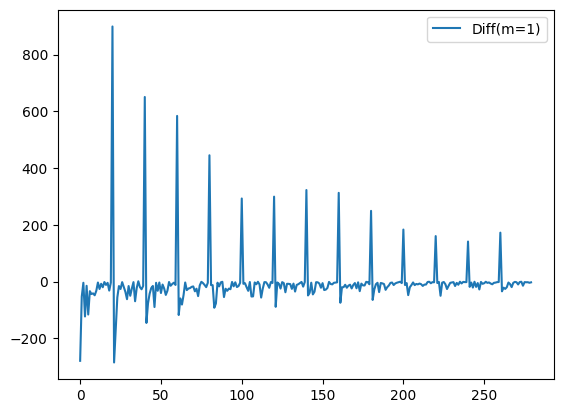

In [15]:
faturamento_diff = get_diff(faturamento)
faturamento_diff.plot()

<Axes: >

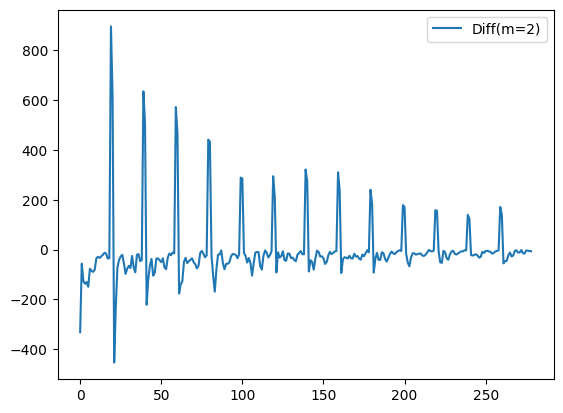

In [16]:
faturamento_diff = get_diff(faturamento, m=2)
faturamento_diff.plot()

Este gráfico mostra como o faturamento dos clubes variou de um período para o outro.



## Definindo as métricas de avaliação

In [17]:
def get_mean_squared_error(ground_truth, pred):
  return np.square(np.subtract(ground_truth, pred)).mean()

def get_root_mean_squared_error(ground_truth, pred):
  return np.sqrt(get_mean_squared_error(ground_truth, pred))

def get_mean_absolute_error(ground_truth, pred):
  return np.abs(ground_truth, pred).mean()

def get_mean_absolute_percentage_error(ground_truth, pred):
  return np.abs((ground_truth - pred) / pred).mean() * 100


def get_average_relative_error(ground_truth, pred):
  mean = np.mean(ground_truth)
  sup = np.square(np.subtract(ground_truth, pred)).sum()
  inf = np.square(np.subtract(ground_truth, mean)).sum()

  return sup / inf

def get_metrics(ground_truth, pred):
  mse = get_mean_squared_error(ground_truth, pred)
  rmse = get_root_mean_squared_error(ground_truth, pred)
  mae = get_mean_absolute_error(ground_truth, pred)
  mape = get_mean_absolute_percentage_error(ground_truth, pred)
  avr = get_average_relative_error(ground_truth, pred)

  return {"mse": mse,
          "rmse": rmse,
          "mae": mae,
          "mape": mape,
          "avr": avr}

In [18]:
test_percent = 0.3
horizonte = 2
ts = faturamento_diff
test_size = int(len(ts) * test_percent)
X_train, X_test = ts[:-(test_size+horizonte-1)], ts[-(test_size+1):]

In [19]:
lag = 12

autoreg_model = AutoReg(X_train, lags=lag)
ma_model = ARIMA(X_train, order=(0, 0, lag))
ar_model = ARIMA(X_train, order=(lag, 0, 0))
arma_model = ARIMA(X_train, order=(lag, 0, lag))

In [20]:
ma_results = ma_model.fit()
ma_preds = ma_results.predict(start=len(X_train),
                              end=len(X_train) + len(X_test) - 1)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
get_metrics(X_test.values.squeeze(), ma_preds.values)

{'mse': 2257.5875101508877,
 'rmse': 47.51407696831422,
 'mae': 30.138095238095243,
 'mape': 180.95238095238096,
 'avr': 0.656456080093524}

In [22]:
autoreg_results = autoreg_model.fit()
autoreg_preds = autoreg_results.predict(start=len(X_train),
                                        end=len(X_train) + len(X_test) - 1,
                                        dynamic=False)

In [23]:
ar_results = ar_model.fit()
ar_preds = ar_results.predict(start=len(X_train),
                              end=len(X_train) + len(X_test) - 1)

In [24]:
arma_results = arma_model.fit()
arma_preds = arma_results.predict(start=len(X_train),
                                  end=len(X_train) + len(X_test) - 1)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
ar_preds = ar_preds.values.squeeze()  # Caso seja um DataFrame ou uma coluna com mais de uma dimensão
ma_preds = ma_preds.values.squeeze()
arma_preds = arma_preds.values.squeeze()
X_test = X_test.values.squeeze()


AutoReg: {'mse': 2718.9946127656067, 'rmse': 52.143979640660405, 'mae': 30.138095238095243, 'mape': 180.95238095238096, 'avr': 0.656456080093524} 
AR: {'mse': 2712.364188909706, 'rmse': 52.08036279548853, 'mae': 30.138095238095243, 'mape': 180.95238095238096, 'avr': 0.656456080093524} 
MA: {'mse': 1808.769047619047, 'rmse': 42.5296255287893, 'mae': 30.138095238095243, 'mape': 180.95238095238096, 'avr': 0.656456080093524} 
ARMA: {'mse': 1701.1542801606715, 'rmse': 41.24505158392545, 'mae': 30.138095238095243, 'mape': 180.95238095238096, 'avr': 0.656456080093524} 



<Axes: >

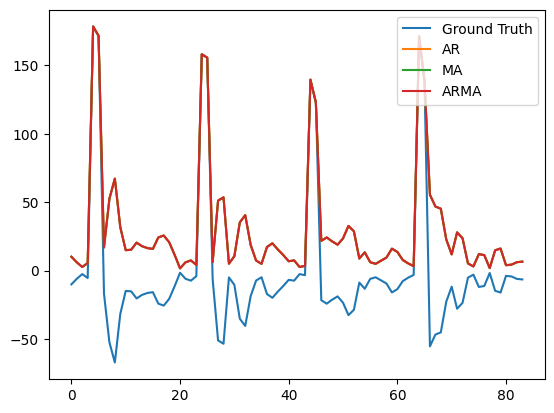

In [26]:
print(f"AutoReg: {get_metrics(X_test, autoreg_preds)} \n" + \
      f"AR: {get_metrics(X_test, ar_preds)} \n" + \
      f"MA: {get_metrics(X_test, ma_preds)} \n" + \
      f"ARMA: {get_metrics(X_test, arma_preds)} \n")

results = {
    "Ground Truth": X_test,
    "AR": ar_preds,
    "MA": ma_preds,
    "ARMA": arma_preds,
}

df_results = pd.DataFrame(results)
df_results.plot()

O MA deu um erro menor em relação aos outros métodos.

In [27]:
def arima_fit_predict(tsd, test_size, horizon, m):
    ts_train, ts_test = tsd[:-(test_size+horizon-1)], tsd[-(test_size+horizon-1):]
    arima_run = auto_arima(ts_train,
                           start_p=8, max_p=15,
                           d=None, # max_d=3,
                           start_q=8, max_q=15,
                           start_P=4, max_P=8,
                           D=None, # max_D=1,
                           start_Q=4, max_Q=8,
                           m=m,
                           max_order=25,
                           stepwise=True, trace=True, max_iter=50)

    arima_preds = arima_run.predict(len(ts_test))

    return arima_preds

test_size = int(len(faturamento) * test_percent)

Performing stepwise search to minimize aic
 ARIMA(8,1,8)(4,0,4)[12] intercept   : AIC=inf, Time=47.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2410.142, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2409.839, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2408.606, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2408.453, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2412.007, Time=0.09 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2412.001, Time=0.07 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2413.955, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2408.148, Time=0.13 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2409.815, Time=0.36 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2411.714, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2407.986, Time=0.17 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2409.478, Time=0.44 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=2409.426, Time=0.34 sec
 ARIMA(2,1,0)(1,0,1)[12

<Axes: >

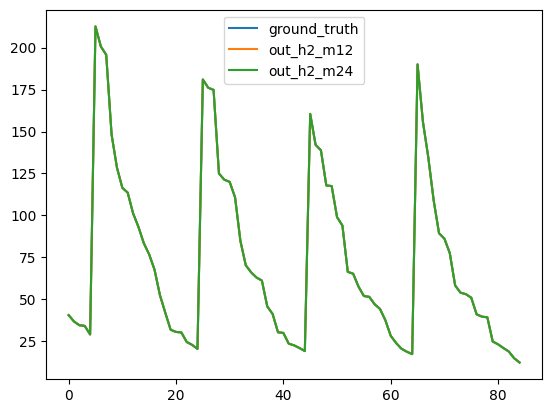

In [28]:
results_arima_h2 = {}

results_arima_h2["ground_truth"] = faturamento.values[-(test_size+1):]
results_arima_h2["out_h2_m12"] = arima_fit_predict(faturamento.values, test_size, 2, 12)
results_arima_h2["out_h2_m24"] = arima_fit_predict(faturamento.values, test_size, 2, 24)

print(f"ARIMA H2 M12: {get_metrics(results_arima_h2['ground_truth'], results_arima_h2['out_h2_m12'])} \n" + \
      f"ARIMA H2 M24: {get_metrics(results_arima_h2['ground_truth'], results_arima_h2['out_h2_m24'])} \n")

results_arima_h2_df = pd.DataFrame(results_arima_h2)
results_arima_h2_df.plot()

## MLP

In [29]:
from sklearn.neural_network import MLPRegressor
mlp_sk = MLPRegressor(activation='logistic', solver='lbfgs')

In [30]:
def create_windowing(data, lag_size):
  rows = []
  for i in range(lag_size, len(data)):
    row = list(data[i - lag_size: i].values)
    row.append(data[i])
    rows.append(row)

  return rows

In [31]:
from sklearn.preprocessing import MinMaxScaler

def fit_predict(train_df, test_df):
  x_train, y_train = train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values.reshape(-1, 1)
  x_test, y_test = test_df.iloc[:, :-1].values, test_df.iloc[:, -1].values.reshape(-1, 1)

  x_scaler = MinMaxScaler()
  x_scaler = x_scaler.fit(x_train)
  y_scaler = MinMaxScaler()
  y_scaler = y_scaler.fit(y_train)

  x_train_scaled = x_scaler.transform(x_train)
  y_train_scaled = y_scaler.transform(y_train)
  x_test_scaled = x_scaler.transform(x_test)

  mlp_sk.fit(x_train_scaled, y_train_scaled)

  y_pred = mlp_sk.predict(x_test_scaled)
  y_pred_renorm = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

  return y_pred, y_pred_renorm, y_test

In [32]:
df.drop(['Clube', 'Estado', 'Faturamento', 'Deficit ou Superavit'], axis='columns', inplace=True)

In [33]:
X = df.drop(columns=['Faturamento(Milhões)'])
y = df['Faturamento(Milhões)']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Criar o modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Treinar o modelo
mlp.fit(X_train, y_train)

# Fazer previsões
y_pred = mlp.predict(X_test)

# Avaliar o desempenho do modelo (usando MSE - erro quadrático médio)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro quadrático médio (MSE): {mse:.4f}')


Erro quadrático médio (MSE): 11796.6160


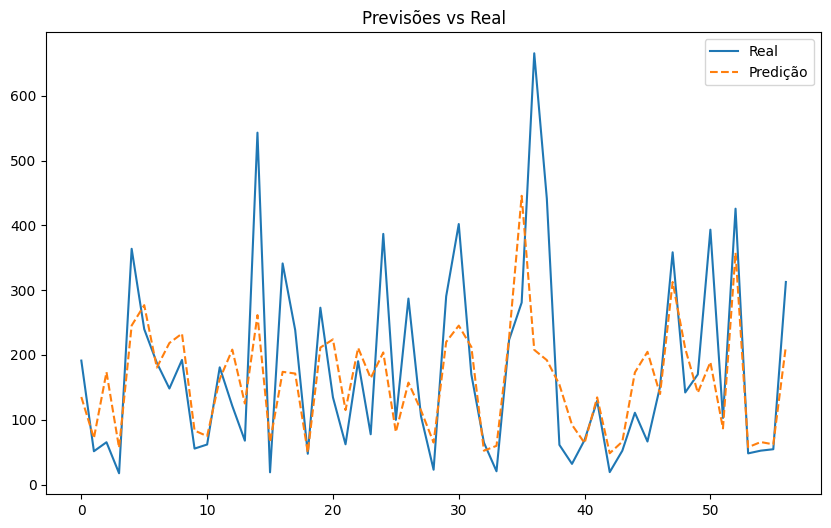

In [36]:
import matplotlib.pyplot as plt

# Plotando as previsões versus os valores reais
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Real")
plt.plot(y_pred, label="Predição", linestyle="--")
plt.legend()
plt.title('Previsões vs Real')
plt.show()


O gráfico acima mostra a relação dos dados reais x os dados preditos ao longo do tempo. Os dados mostram que a predição foi boa, mas teve algumas variações que ocorreu pela não precisão do modelo usado.

In [37]:
print(f"Tamanho do treino: {X_train.shape[0]}")
print(f"Tamanho do teste: {X_test.shape[0]}")

Tamanho do treino: 224
Tamanho do teste: 57


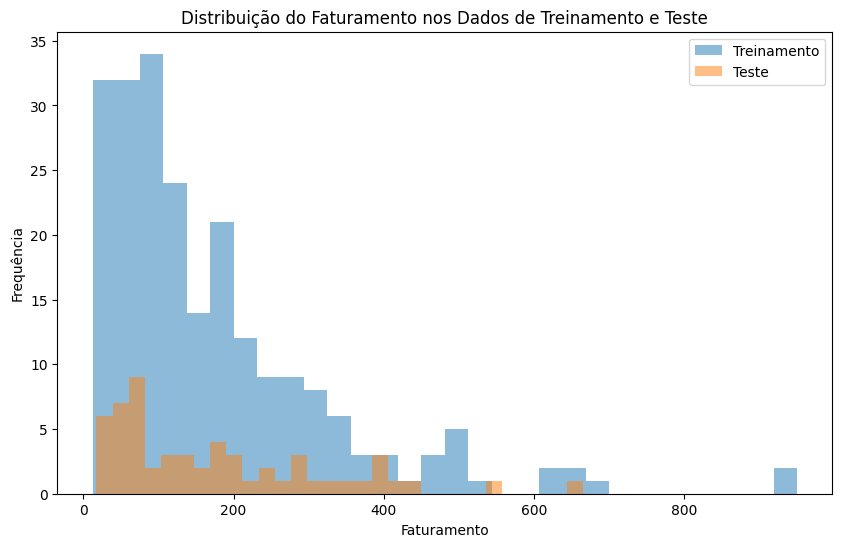

In [38]:
import matplotlib.pyplot as plt

# Verificar a distribuição de valores de 'faturamento' nos dados de treino e teste
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=30, alpha=0.5, label='Treinamento')
plt.hist(y_test, bins=30, alpha=0.5, label='Teste')
plt.legend(loc='upper right')
plt.title('Distribuição do Faturamento nos Dados de Treinamento e Teste')
plt.xlabel('Faturamento')
plt.ylabel('Frequência')
plt.show()


Este gráfico demonstra os dados de treinamento (80%) e testes (20%)